In [80]:
#Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 7)
import warnings
warnings.filterwarnings('ignore')

#Importing Machine Learning Libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [81]:
#Reading the data
df = pd.read_csv('marketing-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  is_success  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [82]:
df['is_success'].value_counts()

no     39922
yes     5289
Name: is_success, dtype: int64

In [83]:
#Checking NaN or null values
df.columns[df.isna().any()].tolist()

[]

In [84]:
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
is_success    0
dtype: int64

### No Null values

In [85]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [86]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


###### No NaN or Null values in any columns

In [87]:
#Let's check the success percent
count = df.groupby('is_success').size()
percent = count / len(df)*100
print(percent)

is_success
no     88.30152
yes    11.69848
dtype: float64


##### Data is highly imbalanced with only 11 percent yes

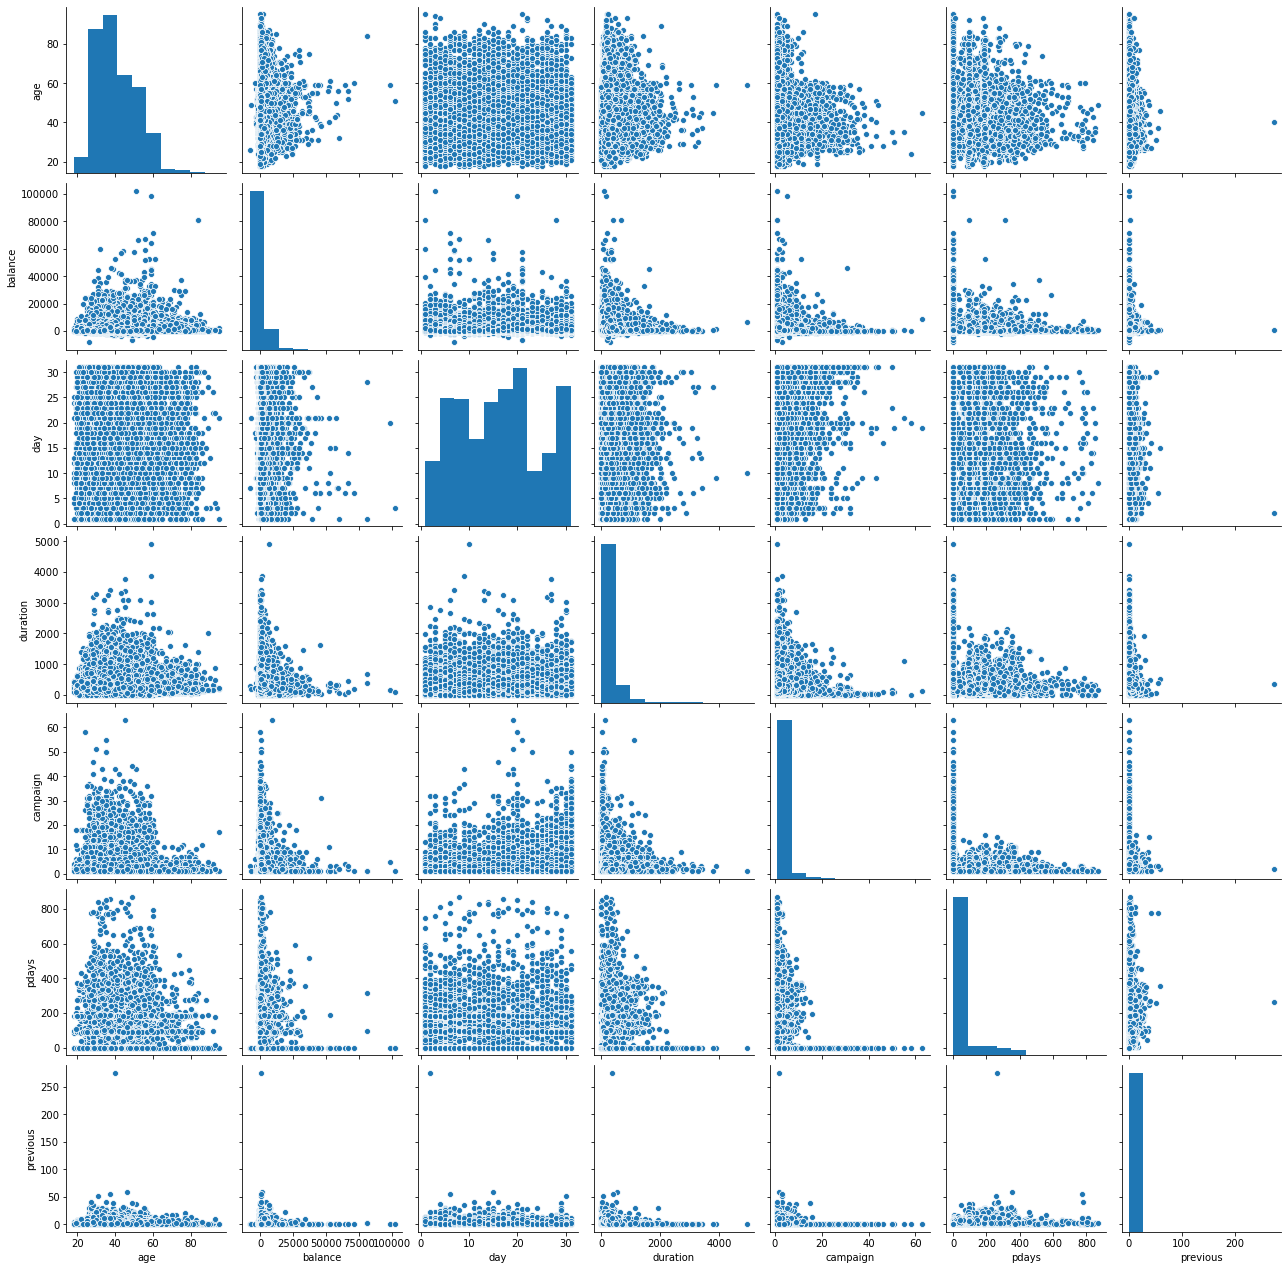

In [88]:
#checking multicollinearity
sns.pairplot(df)

#### There seems to be no multicollinearity but we can cleary see some outliers in previous and pdays. We will start analyzing each variable now

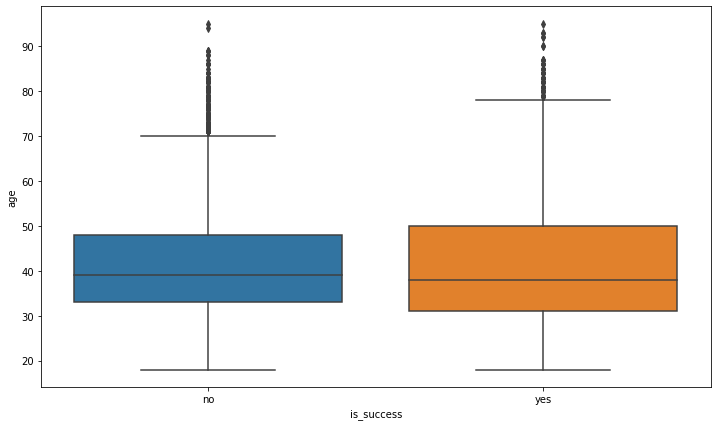

In [89]:
#Age
sns.boxplot(x='is_success', y = 'age', data=df)

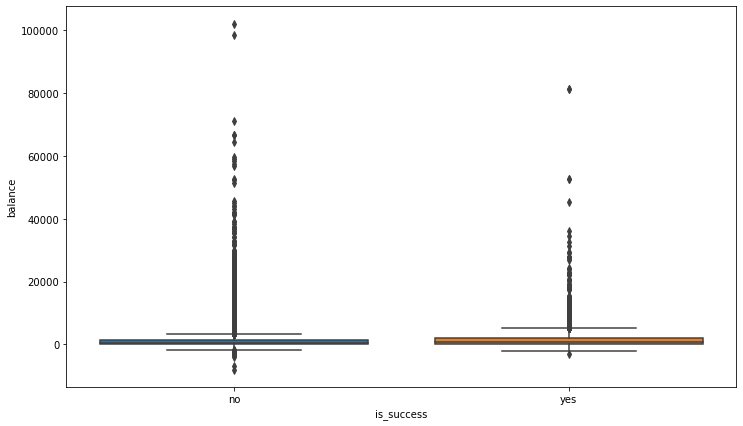

In [90]:
# Balance
sns.boxplot(x='is_success', y = 'balance', data=df)

In [91]:
# Impute outliers function
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [92]:
#Balance has lot of outliers let's fix it
df_new = df
min_val = df['balance'].min()
max_val= 20000 #as most values are under it
df_new = impute_outliers(df=df_new, column='balance', minimum=min_val, maximum=max_val)

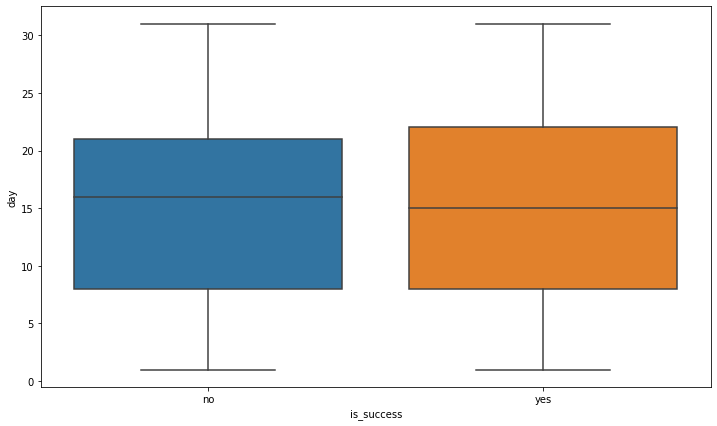

In [93]:
#day
sns.boxplot(x='is_success', y='day', data=df)

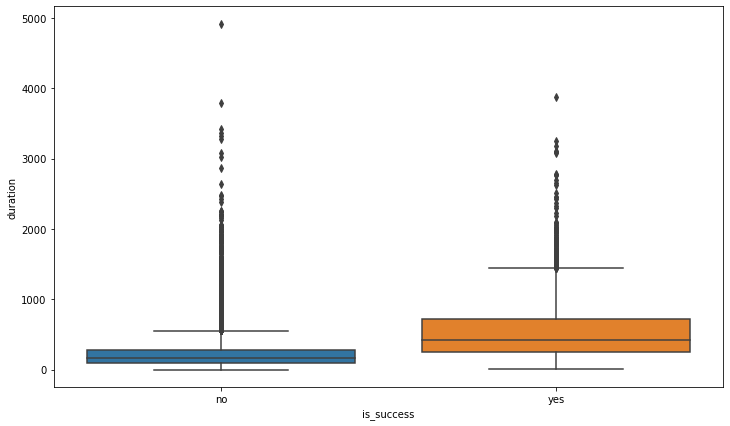

In [94]:
#duration
sns.boxplot(x='is_success', y='duration', data=df)

In [95]:
#Fixing Duration
min_val = df_new["duration"].min()
max_val = 2000
df_new = impute_outliers(df=df_new, column='duration' , minimum=min_val, maximum=max_val)

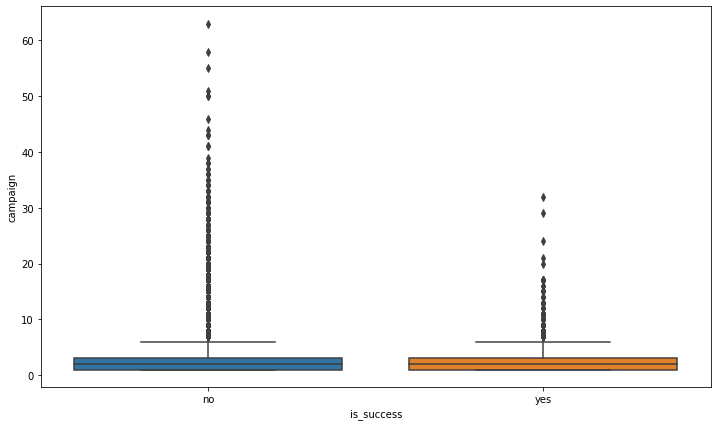

In [96]:
#Campaign
sns.boxplot(x='is_success', y='campaign', data=df)

In [97]:
#Fixing campaign column
min_val = df_new['campaign'].min()
max_val = 20
df_new = impute_outliers(df=df_new, column='campaign', minimum=min_val, maximum=max_val)

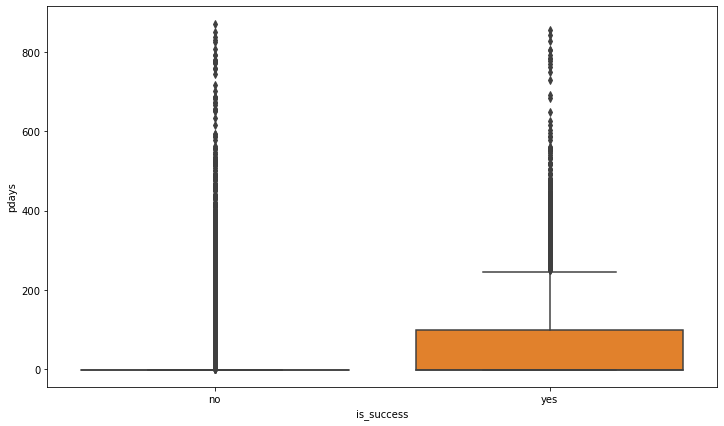

In [98]:
#pdays
sns.boxplot(x='is_success', y='pdays', data=df)

In [99]:
#Fixing pdays column
min_val = df_new['pdays'].min()
max_val = 250
df_new = impute_outliers(df=df_new, column='pdays', minimum=min_val, maximum = max_val)

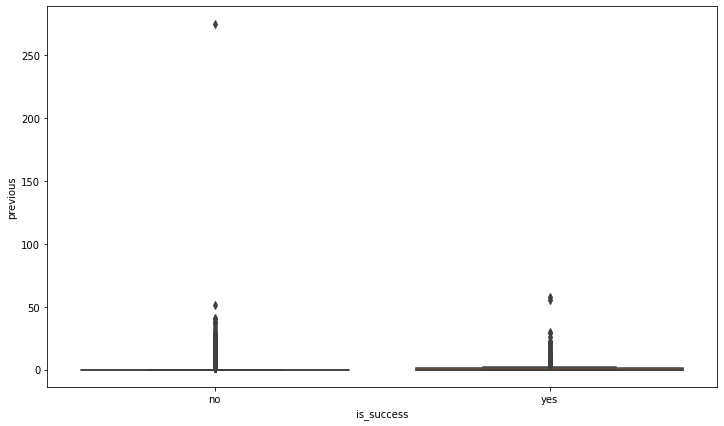

In [100]:
#previous
sns.boxplot(x='is_success', y='previous', data=df)

In [101]:
#Fixing previous
min_val = df_new['previous'].min()
max_val = 15
df_new = impute_outliers(df = df_new, column='previous', minimum=min_val, maximum=max_val)

In [102]:
df_new.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1239.089967,15.806419,255.154379,2.630474,17.370434,0.520972
std,10.618762,2213.867032,8.322476,242.792228,2.456852,47.938636,1.512395
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1397.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,19985.000000,31.000000,1994.000000,20.000000,250.000000,15.000000


#### Data seems fine now

## Categorigcal variables have unknowns in them, let's fix them too

In [103]:
#Impute unknowns function
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', df[column].mode(), col_values)
    return df

job
admin.           11.437482
blue-collar      21.525735
entrepreneur      3.289023
housemaid         2.742695
management       20.919688
retired           5.007631
self-employed     3.492513
services          9.188029
student           2.074716
technician       16.803433
unemployed        2.882042
unknown           0.637013
dtype: float64


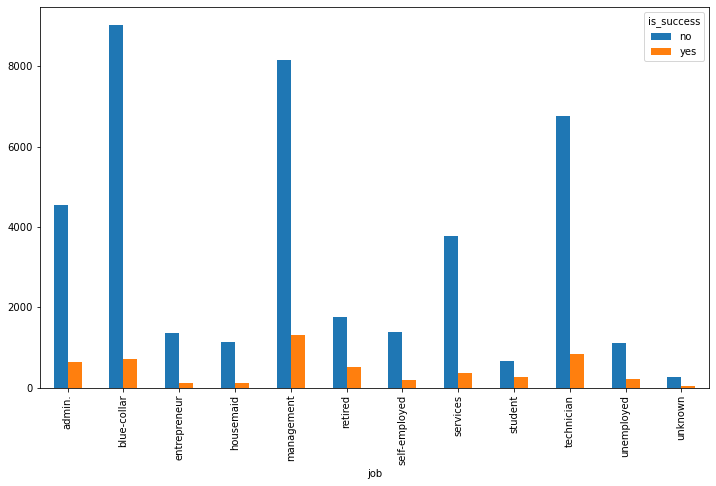

In [104]:
#job
job = pd.crosstab(df['job'], df['is_success'])
job.plot(kind='bar')
print(df.groupby(['job']).size()/len(df)*100)

In [105]:
#Fixing job
df_new = impute_unknowns(df=df_new, column='job')

marital
divorced    11.517109
married     60.193316
single      28.289576
dtype: float64


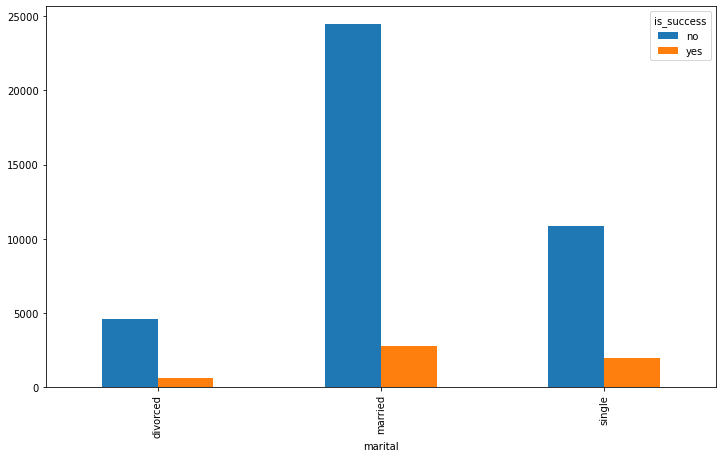

In [106]:
#marital
marital = pd.crosstab(df['marital'], df['is_success'])
marital.plot(kind='bar')
print(df.groupby(['marital']).size()/len(df)*100)

education
primary      15.153392
secondary    51.319369
tertiary     29.419831
unknown       4.107407
dtype: float64


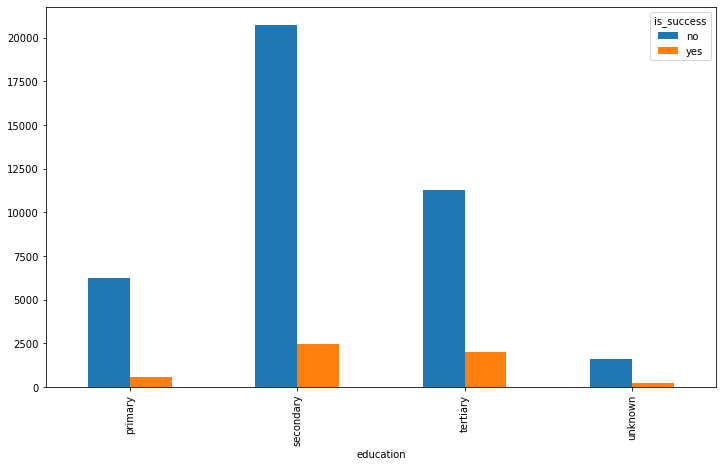

In [107]:
#education
education = pd.crosstab(df['education'], df['is_success'])
education.plot(kind='bar')
print(df.groupby(['education']).size()/len(df)*100)

In [108]:
#Fixing education column
df_new = impute_unknowns(df=df_new, column='education')

default
no     98.197341
yes     1.802659
dtype: float64


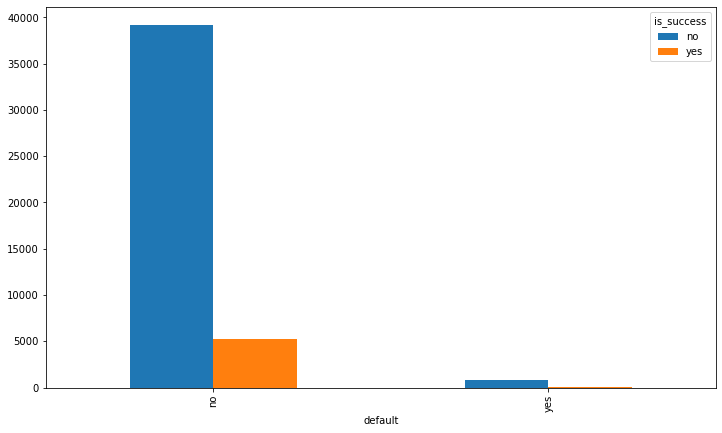

In [109]:
#default
default = pd.crosstab(df['default'], df['is_success'])
default.plot(kind='bar')
print(df.groupby(['default']).size()/len(df)*100)

In [110]:
#highly unbalanced hence drop this
df.drop(['default'], axis=1, inplace=True)

housing
no     44.416182
yes    55.583818
dtype: float64


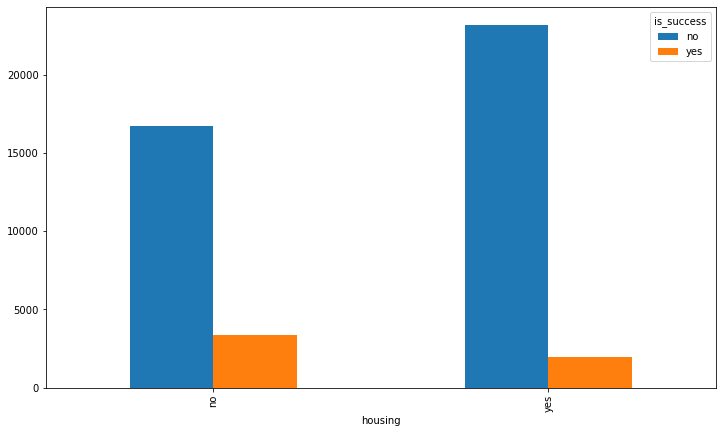

In [111]:
#housing
housing = pd.crosstab(df['housing'], df['is_success'])
housing.plot(kind='bar')
print(df.groupby(['housing']).size()/len(df)*100)

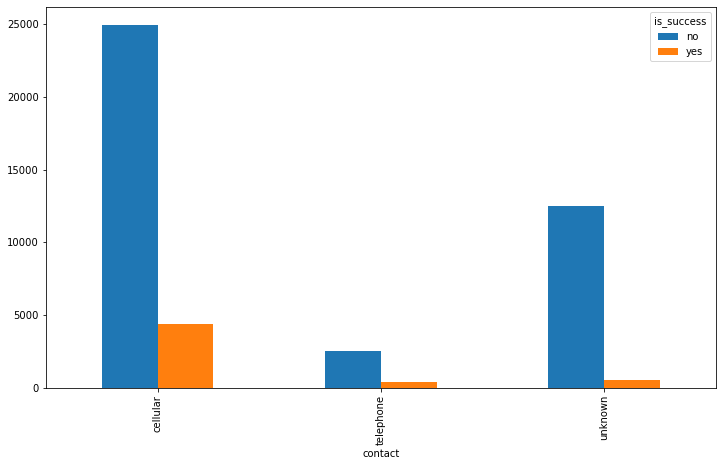

In [112]:
#contact
contact = pd.crosstab(df['contact'], df['is_success'])
contact.plot(kind='bar')
#print(df.groupby(["contact"])).size()/len(df)*100

In [113]:
df.drop(['contact'], axis=1, inplace=True) #doesn't seem like an important feature

month
apr     6.485147
aug    13.817434
dec     0.473336
feb     5.859194
jan     3.103227
jul    15.250713
jun    11.813497
mar     1.055053
may    30.448342
nov     8.781049
oct     1.632346
sep     1.280662
dtype: float64


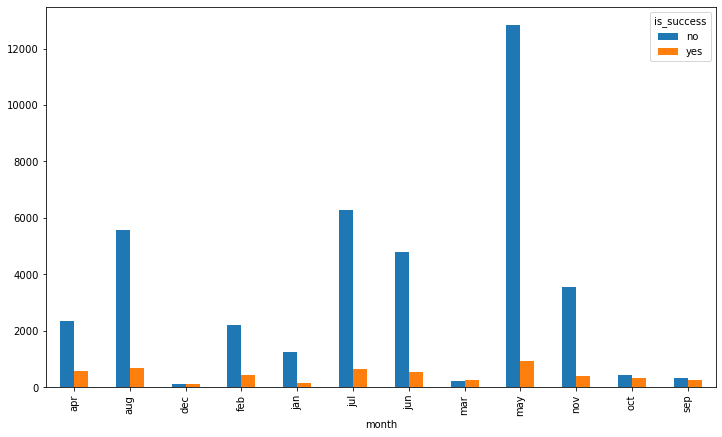

In [114]:
#month
month = pd.crosstab(df['month'], df['is_success'])
month.plot(kind='bar')
print(df.groupby(['month']).size()/len(df)*100)

poutcome
failure    10.840282
other       4.069806
success     3.342107
unknown    81.747805
dtype: float64

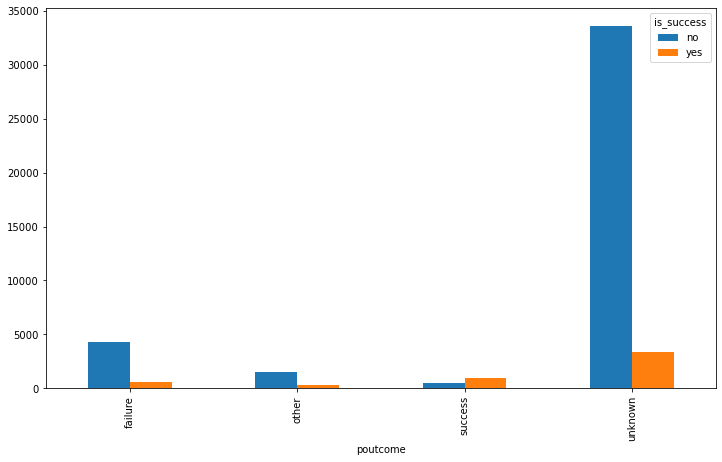

In [115]:
#poutcome
poutcome = pd.crosstab(df['poutcome'], df['is_success'])
poutcome.plot(kind='bar')
df.groupby(['poutcome']).size()/len(df)*100

In [116]:
df.drop(['poutcome'], axis=1, inplace=True) #most of the values of this column is missing

loan
no     83.977351
yes    16.022649
dtype: float64


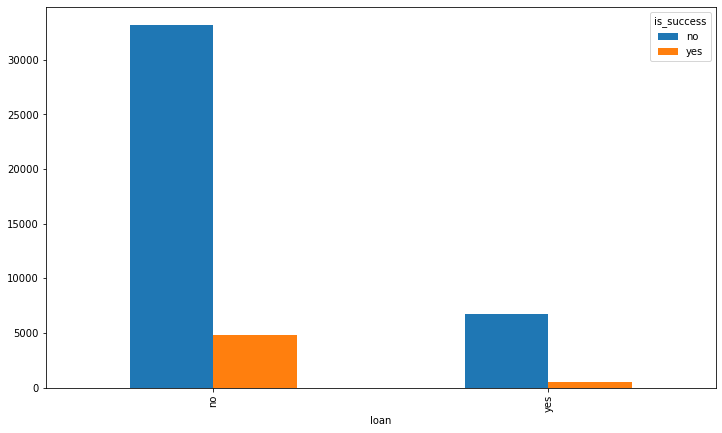

In [62]:
#Loan
loan = pd.crosstab(df['loan'], df['is_success'])
loan.plot(kind='bar')
print(df.groupby(['loan']).size()/len(df)*100)

In [63]:
#Updated dataset
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         45211 non-null  int64  
 1   job         45211 non-null  object 
 2   marital     45211 non-null  object 
 3   education   45211 non-null  object 
 4   balance     45211 non-null  float64
 5   housing     45211 non-null  object 
 6   loan        45211 non-null  object 
 7   day         45211 non-null  int64  
 8   month       45211 non-null  object 
 9   duration    45211 non-null  float64
 10  campaign    45211 non-null  float64
 11  pdays       45211 non-null  float64
 12  previous    45211 non-null  float64
 13  is_success  45211 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 3.6+ MB


## Feature Engineering

In [64]:
#separating target variable from the dataset before creating dummy variable
y = df_new['is_success']
X = df_new[df_new.columns[0:12]]
print(X.head())

   age           job  marital  education  balance housing loan  day month  \
0   58    management  married   tertiary   2143.0     yes   no    5   may   
1   44    technician   single  secondary     29.0     yes   no    5   may   
2   33  entrepreneur  married  secondary      2.0     yes  yes    5   may   
3   47   blue-collar  married  secondary   1506.0     yes   no    5   may   
4   33   blue-collar   single  secondary      1.0      no   no    5   may   

   duration  campaign  pdays  
0     261.0       1.0   -1.0  
1     151.0       1.0   -1.0  
2      76.0       1.0   -1.0  
3      92.0       1.0   -1.0  
4     198.0       1.0   -1.0  


In [65]:
#creating dummy variables
X_dummy = pd.get_dummies(X)
print(X_dummy.head())

   age  balance  day  duration  campaign  pdays  job_admin.  job_blue-collar  \
0   58   2143.0    5     261.0       1.0   -1.0           0                0   
1   44     29.0    5     151.0       1.0   -1.0           0                0   
2   33      2.0    5      76.0       1.0   -1.0           0                0   
3   47   1506.0    5      92.0       1.0   -1.0           0                1   
4   33      1.0    5     198.0       1.0   -1.0           0                1   

   job_entrepreneur  job_housemaid  ...  month_dec  month_feb  month_jan  \
0                 0              0  ...          0          0          0   
1                 0              0  ...          0          0          0   
2                 1              0  ...          0          0          0   
3                 0              0  ...          0          0          0   
4                 0              0  ...          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  mont

In [66]:
X = np.array(X_dummy.values)
Y = np.array(y.values)

In [67]:
X.shape, y.shape

((45211, 39), (45211,))

In [70]:
#splitting the validation dataset
size = 0.20
seed = 7
X_train, X_validation, y_train, Y_validation = model_selection.train_test_split(X, y, test_size=size, random_state = seed)

In [71]:
#scaling the values
X_t = scale(X_train)

#let's use all of our variables as components i.e. 39
pca = PCA(n_components=39)

pca.fit(X_t)

#Amount of variance by each principal component
var = pca.explained_variance_ratio_

#cumulative variance
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

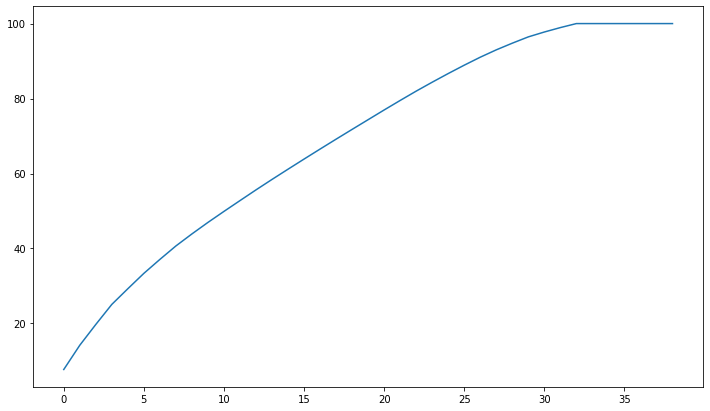

In [72]:
#let's plot the cumilative variance
plt.plot(cum_var)

### From the plot we can see that first 32 components are explaining 100% variability of data. Let's proceed with these 32 components

In [73]:
pca = PCA(n_components=32)
pca.fit(X_t)
X_train_PC = pca.fit_transform(X_t)

## Let's train our models

In [74]:
#Test options
seed = 7
scoring = 'accuracy'

In [75]:
#Algorithms
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [76]:
#evaluating each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train_PC, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.891755 (0.005013)
LDA: 0.891202 (0.004555)
K-NN: 0.883958 (0.004866)
CART: 0.855287 (0.005132)
NB: 0.859241 (0.004832)
SVM: 0.893553 (0.005055)


### "SVM" has highest Accuracy but is slowest while "Logistic Regression" is almost as accurate but faster.

[Text(0, 0, 'LR'),
 Text(0, 0, 'LDA'),
 Text(0, 0, 'K-NN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM')]

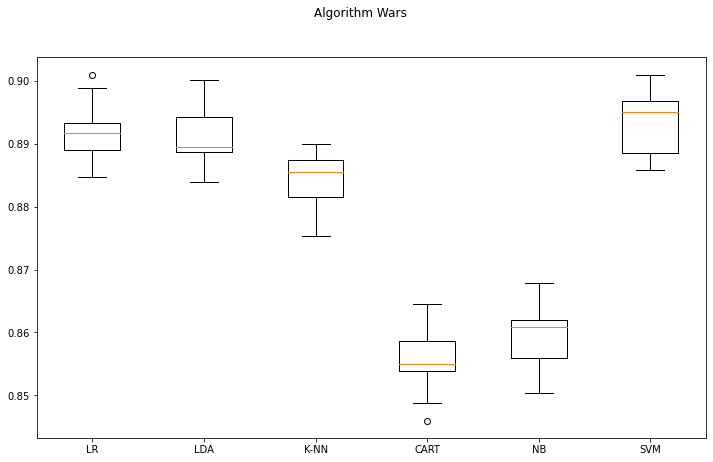

In [77]:
#Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Wars')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

### Logistic Regression is the best model considering accuracy and speed.

# Let's Predict

In [78]:
X_val = scale(X_validation)

pca.fit(X_val)
X_validation_PC = pca.fit_transform(X_val)

In [79]:
#Making Predictions
lr = LogisticRegression()
lr.fit(X_train_PC, y_train)
predictions = lr.predict(X_validation_PC)
print("Accuracy: ", accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy:  0.8828928452947031
[[7744  283]
 [ 776  240]]
              precision    recall  f1-score   support

          no       0.91      0.96      0.94      8027
         yes       0.46      0.24      0.31      1016

    accuracy                           0.88      9043
   macro avg       0.68      0.60      0.62      9043
weighted avg       0.86      0.88      0.87      9043

